In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model as lr
import sklearn.model_selection as train_test_split
from matplotlib import pyplot as plt
import matplotlib

In [80]:
df = pd.read_csv('dataset_risk_analytics.csv')

In [81]:
df

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


In [82]:
df = df.drop_duplicates(subset=['loan_id']) 

In [83]:
data = df.fillna({
    'monthly_income' : df['monthly_income'].mean(),
    'TOB_months' : df['TOB_months'].mean(),
    'closing_principal_balance' : df['closing_principal_balance'].mean(),
    'original_loan_amount' : df['original_loan_amount'].mean(),
    'delq_history' : df['delq_history'].mode()[0],
})

data.isnull().sum()

loan_id                      0
monthly_income               0
origination_score_band       0
TOB_months                   0
closing_principal_balance    0
original_loan_amount         0
product                      0
original_loan_term           0
remaining_loan_term          0
delq_history                 0
target                       0
dtype: int64

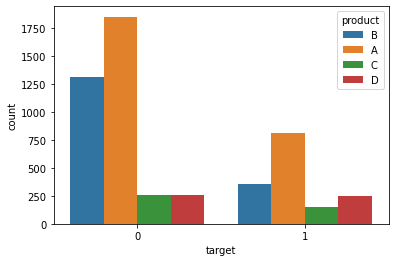

In [84]:
sns.countplot(x='target', hue='product', data=df)
plt.savefig('target_product.jpg')

In [85]:
df['monthly_income'].describe()

count     4873.000000
mean     14414.836856
std      13946.848379
min        750.000000
25%       6000.000000
50%       9750.000000
75%      18000.000000
max      99750.000000
Name: monthly_income, dtype: float64

In [117]:
#Creating Income Classes

def income(x):
    if x < 10000:
        return 'Income Class IV'
    elif x >= 10000 and x < 25000:
        return 'Income Class III'
    elif x >= 25000 and x < 50000:
        return 'Income Class II'
    else:
        return 'Income Class I'

In [104]:
income(99750)

'Income Class I'

In [105]:
income(750)

'Income Class IV'

In [118]:
df['income_class'] = df['monthly_income'].apply(income)
df

C:\Users\Manyi\AppData\Local\Temp\ipykernel_26144\2994614909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_class'] = df['monthly_income'].apply(income)


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target,income_class,closing_principal_balance_category,original_loan_amount_group
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0,Income Class II,Cat IV,Group IV
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0,Income Class III,Cat IV,Group IV
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1,Income Class III,Cat IV,Group IV
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0,Income Class III,Cat IV,Group IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1,Income Class IV,Cat IV,Group IV


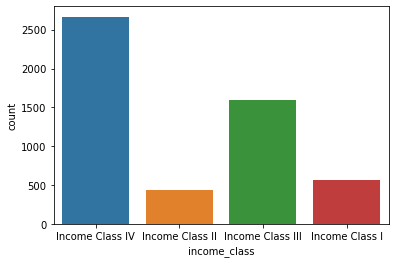

In [122]:
sns.countplot(x='income_class', data=df)
plt.savefig('income-class.jpg')

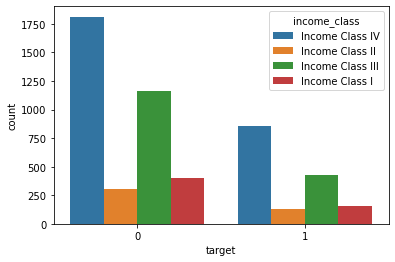

In [120]:
sns.countplot(x='target', hue='income_class', data=df)
plt.savefig('target_income-class.jpg')

In [91]:
df['closing_principal_balance'].max()

88200.0

In [92]:
df['closing_principal_balance'].min()

100.0

In [123]:
#Creating Closing Principal Balance Categories

def balance(x):
    if x < 10000:
        return 'Cat IV'
    elif x >= 10000 and x < 25000:
        return 'Cat III'
    elif x >= 25000 and x < 50000:
        return 'Cat II'
    else:
        return 'Cat I'

In [109]:
balance(88200)

'Cat I'

In [110]:
df['closing_principal_balance_category'] = df['closing_principal_balance'].apply(balance)
df

C:\Users\Manyi\AppData\Local\Temp\ipykernel_26144\2475515561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['closing_principal_balance_category'] = df['closing_principal_balance'].apply(balance)


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target,income_class,closing_principal_balance_category,original_loan_amount_group
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0,Income Class III,Cat IV,Group I
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0,Income Class IV,Cat IV,Group II
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1,Income Class IV,Cat IV,Group II
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0,Income Class IV,Cat IV,Group III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group II
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group III
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1,Income Class IV,Cat IV,Group I


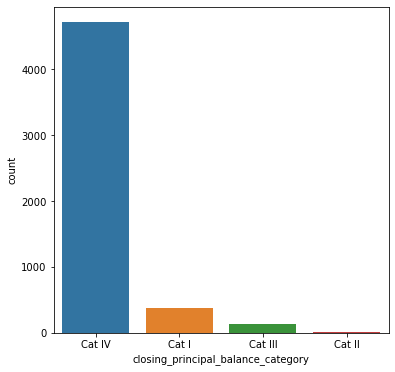

In [124]:
plt.figure(figsize=(6,6))
sns.countplot(x='closing_principal_balance_category', data=df)
plt.savefig('principal-balance.jpg')

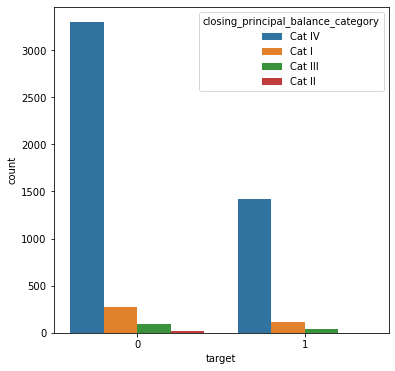

In [112]:
plt.figure(figsize=(6,6))
sns.countplot(x='target', data=df, hue='closing_principal_balance_category')
plt.savefig('target_principal-balance.jpg')

In [97]:
df['original_loan_amount'].max()

90000.0

In [98]:
df['original_loan_amount'].min()

100.0

In [125]:
#Creating Original Loan Amount Groups

def loan(x):
    if x < 10000:
        return 'Group IV'
    elif x >= 10000 and x < 25000:
        return 'Group III'
    elif x >= 25000 and x < 50000:
        return 'Group II'
    else:
        return 'Group I'

In [114]:
loan(90000)

'Group I'

In [115]:
df['original_loan_amount_group'] = df['original_loan_amount'].apply(loan)
df

C:\Users\Manyi\AppData\Local\Temp\ipykernel_26144\1939736897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original_loan_amount_group'] = df['original_loan_amount'].apply(loan)


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target,income_class,closing_principal_balance_category,original_loan_amount_group
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0,Income Class III,Cat IV,Group IV
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0,Income Class IV,Cat IV,Group IV
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1,Income Class IV,Cat IV,Group IV
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0,Income Class IV,Cat IV,Group IV
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1,Income Class IV,Cat IV,Group IV


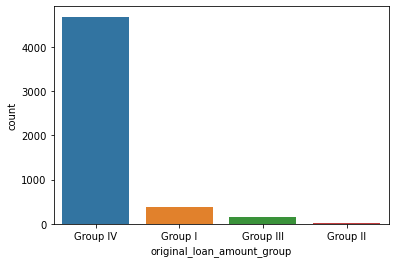

In [126]:
sns.countplot(x='original_loan_amount_group', data=df)
plt.savefig('original-loan.jpg')

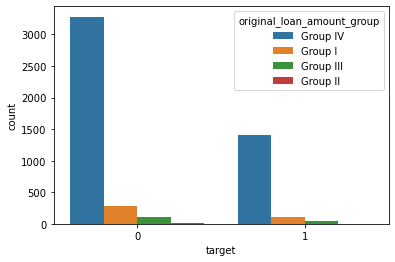

In [127]:
sns.countplot(x='target', hue='original_loan_amount_group', data=df)
plt.savefig('target_original-loan.jpg')